# EDSA Apple Price Challenge - TS3 Regression

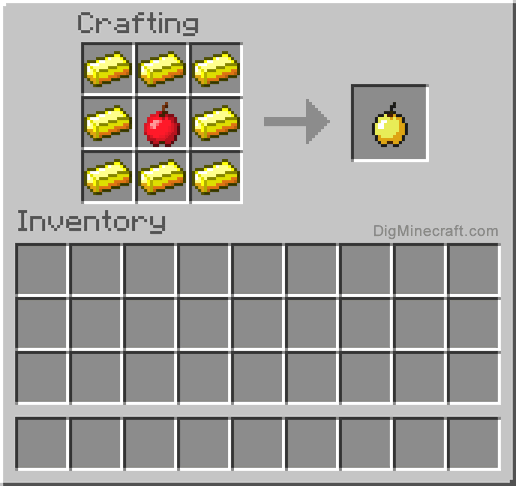

# Introduction

We are going to construct a regression algorithm that will accurately predict the price of the Golden Delicious Apples given the conditions. 

We will embark on a journey to explore the following:


### 1. Collecting/downloading the golden apple data (Data Collection)
   
### 2. Review the dataset for abnormality and make ammendments where necessary (Data cleaning)
a. Null values 

b. Missing Values

c. Duplicate values        
        
### 3. Investigate the data through descriptive statistics and visualisation tools (EDA)
a. Understand the pattern in the data

b. Determine relationship between the variables

c. Discover outliers in the data        
        
### 3. Build the model that will allow us to accurately predict the price of the Golden Apples (Model building)
a. Select the variables that are relevant in making the price decisions

b. Try different algorithms to find the best model

c. Train our best model 

### 4. Deploy our model, and enter the Kaggle competition!

# Importing Python libraries

We will first import all the libraries needed for our journey

In [29]:
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Regression
from sklearn.linear_model import LinearRegression

#Add more as we need

# 1. Data Collection

# Importing the data

We will import our data here

In [17]:
#Importing the test dataset from Git repo

df = pd.read_csv('https://raw.githubusercontent.com/rlatndgb/EDSA-TS3-Regression/main/df-test_set.csv', index_col=0)

In [21]:
#Quick overview of our first 10 data
df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
Index,,,,,,,,,,,,
1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


# 2. Data Cleaning

Let's have a quick overview of our dataset!

In [19]:
#Check the shape of our df
df.shape

(685, 12)

Our data consists of **685 rows** and **12 columns**

In [16]:
#Detailed information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 69.7+ KB


The info command allowed us to confirm that there are **12** variables, some **categorical** and some **numerical**.
We do not have any null values, however we will reassure using another command

In [20]:
df.isnull().sum()

Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

There are **no** null values in our data set. Lovely!

# 3. Exploratory Data Analysis

Let's have a look at some descriptive statistics of our data.

This includes, the **count, mean, standard deviation, minimum, Q1, median, Q3 and maximum value**.

In [23]:
round(df.describe(), 2)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.00,685.00,685.00,685.00,685.00,685.00,685.00
mean,34.14,164.20,195.59,18788.11,174.88,2725.40,439.25
std,87.58,355.17,389.11,33951.59,299.35,5059.12,715.99
min,3.00,10.00,10.00,10.00,1.00,6.30,0.00
25%,9.00,50.00,64.00,1300.00,13.00,204.00,20.00
50%,12.00,80.00,112.00,5520.00,62.00,860.10,153.00
75%,18.30,128.00,160.00,21176.00,200.00,3033.00,516.00
max,400.00,2400.00,2400.00,308010.00,2774.00,47200.00,6827.00


You can also investigate the descriptive statistics of individual columns by:

    df['column'].describe()

Is our data in Gausian form? Let's have a look at the skewness and kurtosis of our data!

Kurtosis is the measure of outliers: **High kurtosis (>3)** and **low kurtosis (3>)** indicates large and lack of outliers, respectively.

Skewness indicates the symmetry of the data

In [24]:
df.kurtosis()

Weight_Kg         13.611804
Low_Price         20.126362
High_Price        17.610473
Sales_Total       19.626133
Total_Qty_Sold    19.531658
Total_Kg_Sold     24.423404
Stock_On_Hand     14.868371
dtype: float64

The kurtosis shows that there are likely be many outliers in our dataset. We will bear this in our mind when we visualise the data. 

In [25]:
df.skew()

Weight_Kg         3.941111
Low_Price         4.585123
High_Price        4.326922
Sales_Total       3.839600
Total_Qty_Sold    3.710551
Total_Kg_Sold     4.270965
Stock_On_Hand     3.197405
dtype: float64

All our data have skewnesss higher thatn 1. Which tells us that it is positively skewed.

Let's determine if there are any linear relationship betweem using Pearson's correlation. 

For now, we are assumung that our data is normal (we will log transform it later)

In [26]:
df.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
Weight_Kg,1.000000,0.894615,0.925537,0.140129,-0.123981,0.255056,-0.133762
Low_Price,0.894615,1.000000,0.963068,0.137629,-0.126267,0.223185,-0.124254
High_Price,0.925537,0.963068,1.000000,0.206280,-0.102852,0.315313,-0.107934
Sales_Total,0.140129,0.137629,0.206280,1.000000,0.830766,0.967193,0.398349
Total_Qty_Sold,-0.123981,-0.126267,-0.102852,0.830766,1.000000,0.752598,0.466751
Total_Kg_Sold,0.255056,0.223185,0.315313,0.967193,0.752598,1.000000,0.347455
Stock_On_Hand,-0.133762,-0.124254,-0.107934,0.398349,0.466751,0.347455,1.000000


Let's make a visualisation for easier interpretation.

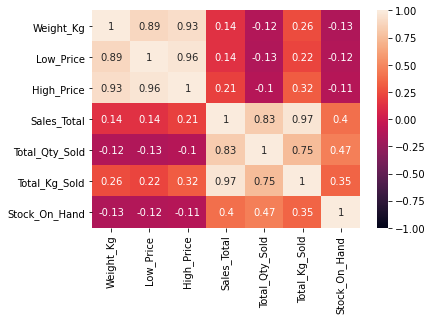

In [27]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

### Add some more visualisations!

At this point, we should think which variables are redundant.

For instance, do we want to keep total qty sold AND totla kg sold? Are they not the same in some sense?

Also, we should think about which variables / features are relavant in making our model. (Feature selection)

# 4. Model building

How do we build a multivariate model? I don't know yet

The formula for a simple regression is:

$$\hat{y}_i = a + bx_i$$   

We can do this using the sklearn package

### Finding the Line of Best Fit

Fitting the linear model

### Getting model predictions

### Assess the accuracy of our model

Residual Sum of Squares (RSS)

Mean Squared Error

R squared

# Deploying our model!